# Introduction
In this project, we employ existing machine learning models to predict house prices. The dataset for this study comprises 809 houses, each characterized by the following features:

* Price: The price of the house.

* Area: The total area of the house in square feet.

* Bedrooms: The number of bedrooms in the house.

* Bathrooms: The number of bathrooms in the house.

* Stories: The number of stories in the house.

* Mainroad: Whether the house is connected to the main road (Yes/No).

* Guestroom: Whether the house has a guest room (Yes/No).

* Basement: Whether the house has a basement (Yes/No).

* Hot water heating: Whether the house has a hot water heating system (Yes/No).

* Airconditioning: Whether the house has an air conditioning system (Yes/No).

* Parking: The number of parking spaces available within the house.

* Prefarea: Whether the house is located in a preferred area (Yes/No).

* Furnishing status: The furnishing status of the house (Fully Furnished, Semi-Furnished, Unfurnished).

* House Age: the house age.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from src.data_science.data import split_data
from sklearn.metrics import r2_score

# 1 Exploration of the data 

## 1.1 Importation of the data

In [2]:
# We import the 'load_data' function, which read a csv file and convert it to a pandas.DataFrame
from src.data_processing.load_data import load_data

# Importation of the data
df = load_data('data/house_prices.csv')

# We show the first 5 lines of the data
df.head()

,price,AreA,bedrooms,BATHROOMS,stories,mainroad,guestroom,basement,hotwaterheating,air conditioning,parking,prefarea,furnishing STATUS,houSeaGe
0,4543000.0,4990.0,4.0,2.0,2.0,yes,yes,yes,no,no,0.0,yes,furnished,15.0
1,8080940.0,7000.0,3.0,2.0,4.0,yes,no,no,no,yes,2.0,no,FURNISHED,11.0
2,8750000.0,4321.0,3.0,2.0,2.0,yes,no,yes,yes,no,2.0,no,FURNISHED,NaN
3,1890000.0,1700.0,3.0,1.0,2.0,yes,no,no,no,no,0.0,no,unfurnished,NaN
4,12215000.0,7500.0,4.0,2.0,2.0,yes,no,yes,no,yes,3.0,yes,furnished,NaN


## 1.2 Data preprocessing

### Data formatting

In [3]:
# We import the 'format_data' function, which, for example, transforms column names into lowercase and substitutes spaces with underscores.
from src.data_processing.form_data import format_data

# We apply the function format_data to the dataframe df 
df = format_data(df) 

# We show the first 3 lines 
df.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,air_conditioning,parking,prefarea,furnishing_status,houseage
0,4543000.0,4990.0,4.0,2.0,2.0,yes,yes,yes,no,no,0.0,yes,furnished,15.0
1,8080940.0,7000.0,3.0,2.0,4.0,yes,no,no,no,yes,2.0,no,furnished,11.0
2,8750000.0,4321.0,3.0,2.0,2.0,yes,no,yes,yes,no,2.0,no,furnished,NaN


### 1.2.2 Missing values


In [4]:
# Displaying the number of missing values for each feature
df.isnull().sum(axis = 0) 

price                 20
area                  15
bedrooms              24
bathrooms             21
stories               15
mainroad              16
guestroom             23
basement              22
hotwaterheating       18
air_conditioning      15
parking               16
prefarea              14
furnishing_status     23
houseage             804
dtype: int64

In [5]:
# We notice that houseage column has 804 missing value out of 809, so we remove this column from the dataframe df
df = df.drop('houseage', axis=1)

# Since we want to predict the price, we also remove missing values for the 'price' column
df.dropna(subset=['price'], inplace=True)

# Displaying the new number of missing values for each column
df.isnull().sum()

price                 0
area                 13
bedrooms             21
bathrooms            19
stories              15
mainroad             14
guestroom            20
basement             21
hotwaterheating      17
air_conditioning     13
parking              16
prefarea             13
furnishing_status    20
dtype: int64

## 1.3 Visualisation of the data

### 1.3.1 Univariate analysis

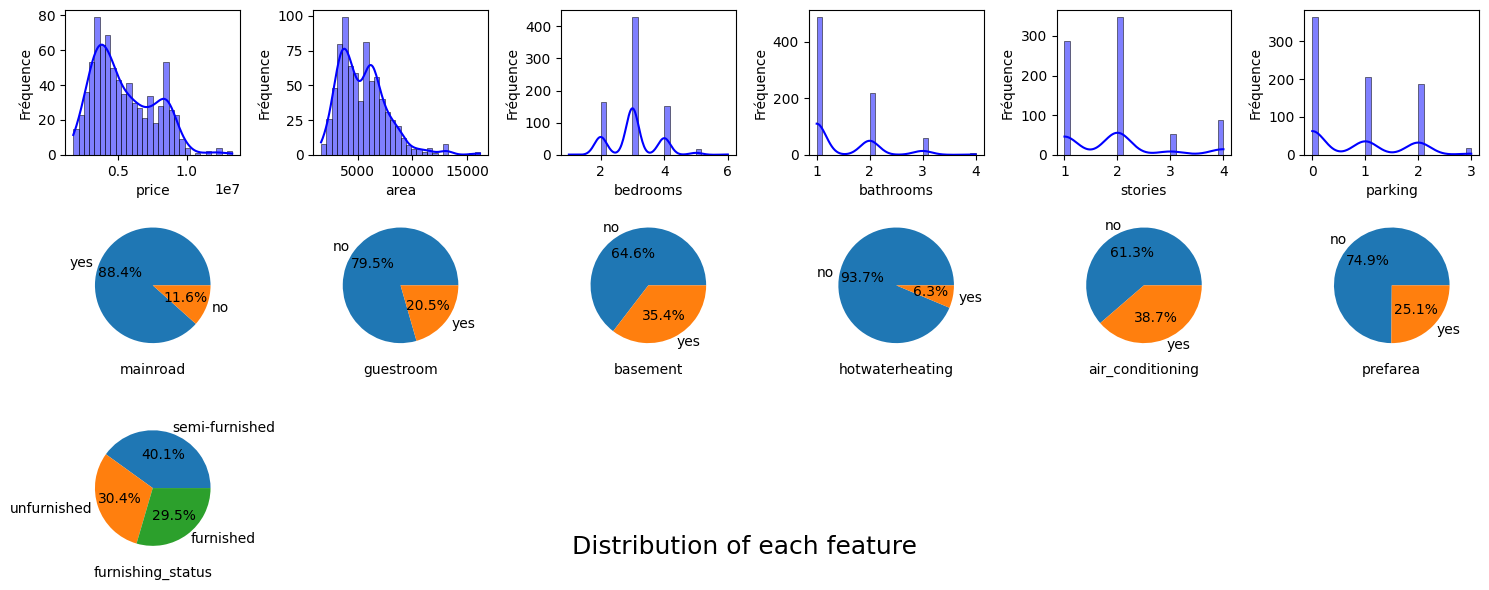

In [6]:
# We import the 'univariate_analysis' function that displays the distribution of each feature
from src.figures.__init__ import univariate_analysis

# Displaying the distribution of each feature
univariate_analysis(df)

### 1.3.2 Multivariate analysis

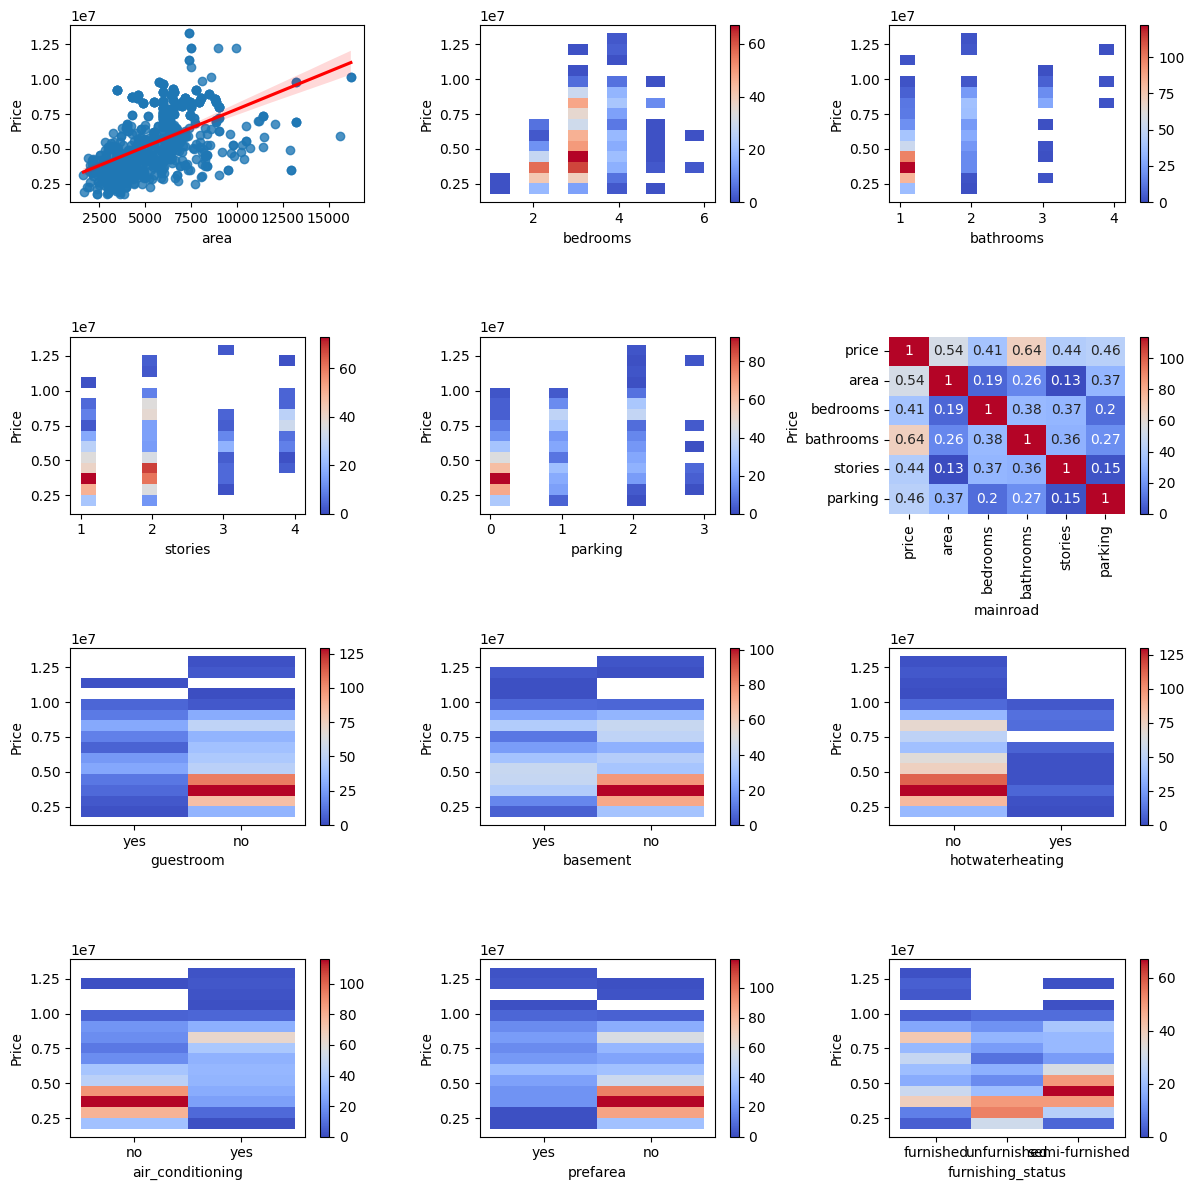

In [7]:
# We import the 'multivariate_analysis' function, which displays price correlations with various features
from src.figures.__init__ import multivariate_analysis 

# Displaying correlations with the price
multivariate_analysis(df)
   

## Dealing with missing values

In [8]:
# We load the 'handle_missing_values' function, which replace missing values by the mean or the median
from src.data_processing.missing_values import handle_missing_values

# Imputation of the data frame 
df = handle_missing_values(df)

In [9]:
# Checking for any remaining missing values
df.isnull().sum()

price                0
area                 0
bedrooms             0
bathrooms            0
stories              0
mainroad             0
guestroom            0
basement             0
hotwaterheating      0
air_conditioning     0
parking              0
prefarea             0
furnishing_status    0
dtype: int64

### 1.4 Encoding of categorical variables

In [10]:
# We load the 'variable_encoding' function
from src.data_processing.encoding import variable_encoding

# We encode the categorical variables of the dataframe 
df = variable_encoding(df)

# Displaying the first 10 lines of the encoded dataframe df
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,air_conditioning,parking,prefarea,furnishing_status_furnished,furnishing_status_semi_furnished,furnishing_status_unfurnished
0,4543000.0,4990.0,4.0,2.0,2.0,1,1,1,0,0,0.0,1,1,0,0
1,8080940.0,7000.0,3.0,2.0,4.0,1,0,0,0,1,2.0,0,1,0,0
2,8750000.0,4321.0,3.0,2.0,2.0,1,0,1,1,0,2.0,0,1,0,0
3,1890000.0,1700.0,3.0,1.0,2.0,1,0,0,0,0,0.0,0,0,0,1
4,12215000.0,7500.0,4.0,2.0,2.0,1,0,1,0,1,3.0,1,1,0,0
5,2275000.0,3970.0,3.0,1.0,2.0,1,0,1,0,0,0.0,0,0,0,1
6,8400000.0,5500.0,4.0,2.0,2.0,1,0,1,0,1,1.0,1,0,1,0
8,6230000.0,6600.0,3.0,2.0,1.0,1,0,1,0,1,0.0,1,0,0,1
9,2730000.0,4000.0,3.0,1.0,2.0,1,0,0,0,0,1.0,0,0,0,1
10,8043000.0,7482.0,3.0,2.0,3.0,1,0,0,1,0,1.0,1,1,0,0


# 2 Cross validation


In [11]:
# We load the 'split_data' function, which split the data to train and test
from src.data_science.data import split_data

# 3 Machine learning

## 3.1 Baseline

In [12]:
 from config.__init__ import TEST_RATIO, SEED

# We split the data with a propotion of TEST_RATION for test
X_train, y_train, X_test, y_test = split_data(df,test_ratio= TEST_RATIO, seed= SEED)

# Create a list to store predictions from the baseline model
predictions = []

# Loop to predict prices using the mean of the number of bedrooms
for i in range(int(df['bedrooms'].min()), int(df['bedrooms'].max()) + 1):
    mean_price = y_train[X_train['bedrooms'] == i].mean()
    print(f"A house with {i} bedrooms costs {mean_price} euros")
    predictions.append(mean_price)

# Create a NumPy array with the first column as predictions and the second column as the true values
concatenated_data = np.concatenate((X_test[['bedrooms']], y_test), axis=1)
for i in range(len(concatenated_data)):
    index = int(concatenated_data[i, 0])
    concatenated_data[i, 0] = predictions[index - 1]

y_pred = concatenated_data[:, 0]
y_test = concatenated_data[:, 1]

from sklearn.metrics import mean_absolute_error, r2_score

# Calculate the Mean Absolute Error
mean_absolute_err = mean_absolute_error(y_pred, y_test)
print("Mean Absolute Error:", mean_absolute_err)

# Calculate the Coefficient of Determination (R-squared)
r_squared = r2_score(y_test, y_pred)
print("Coefficient of Determination (R-squared):", r_squared)


A house with 1 bedrooms costs price    2712500.0
dtype: float64 euros
A house with 2 bedrooms costs price    3.704577e+06
dtype: float64 euros
A house with 3 bedrooms costs price    5.577892e+06
dtype: float64 euros
A house with 4 bedrooms costs price    6452250.0
dtype: float64 euros
A house with 5 bedrooms costs price    6.719462e+06
dtype: float64 euros
A house with 6 bedrooms costs price    3500000.0
dtype: float64 euros
Mean Absolute Error: 1569523.3424442671
Coefficient of Determination (R-squared): 0.24491448526966908


C:\Users\houss\AppData\Local\Temp\ipykernel_17416\1494260323.py:19: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  concatenated_data[i, 0] = predictions[index - 1]


## 3.2 Modèle de régression linéaire ...

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

def regression_lineaire(X_train, y_train, X_test):
    """
    Description:
    Fits a linear regression model to the data.

    Args:
        X_train (pandas.DataFrame): Training feature data.
        y_train (pandas.Series): Training target data.
        X_test (pandas.DataFrame): Test feature data.

    Returns:
        model (LinearRegression): Fitted linear regression model.
        y_pred (numpy.ndarray): Predicted values on test data.
        mae (float): Mean Absolute Error.
        r2 (float): R² Score.
    """
    # Create a multiple regression model
    model = LinearRegression()
    
    # Entraîner le modèle sur les données d'entraînement
    model.fit(X_train, y_train)
    
    # Prédire les valeurs sur les données de test
    y_pred = model.predict(X_test)
    
    # Calculer les métriques d'évaluation
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return model, y_pred, mae, r2

In [14]:
model, y_pred, mae, r2 = regression_lineaire(X_train, y_train, X_test)

print("Résultats de la régression linéaire :")
print(f"Mean Absolute Error: {mae}")
print(f"R² Score: {r2}")

# Pour afficher le modèle entraîné, vous pouvez imprimer les coefficients
print("Coefficients du modèle de régression linéaire :")
print(model.coef_)
# ...

Résultats de la régression linéaire :
Mean Absolute Error: 897942.1848628432
R² Score: 0.7040979262577023
Coefficients du modèle de régression linéaire :
[[ 2.35505304e+02  1.22081650e+05  1.17739414e+06  4.43338086e+05
   4.55929118e+05  3.42328259e+05  4.43437340e+05  1.31974240e+06
   9.66240345e+05  3.77292520e+05  6.66678745e+05  1.30696335e+04
   2.04549072e+05 -2.17618705e+05]]


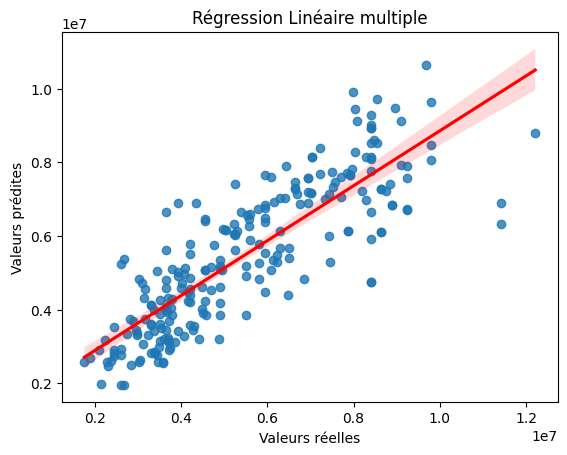

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

def scatter_plot_regression(y_test, y_pred):
    """
    Affiche un scatter plot avec une régression linéaire.

    Args:
    - y_test (array-like): Les valeurs réelles.
    - y_pred (array-like): Les valeurs prédites.
    """
    sns.regplot(x=y_test, y=y_pred, line_kws={"color": 'red'})
    plt.xlabel("Valeurs réelles")
    plt.ylabel("Valeurs prédites")
    plt.title("Régression Linéaire multiple")
    plt.show()

# Utilisation de la fonction
scatter_plot_regression(y_test, y_pred)

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
# Créer une instance du modèle
rf_model = RandomForestRegressor(n_estimators=20, random_state=0)  # On peut ajuster les hyperparamètres

# Entraîner le modèle sur les données d'entraînement
rf_model.fit(X_train, y_train.values.ravel())  # Utilisez values.ravel() pour convertir y_train en un tableau 1D

RandomForestRegressor(n_estimators=20, random_state=0)

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Définir différentes valeurs pour n_estimators et max_depth
n_estimators_values = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140]
max_depth_values = [1, 2, 3, 4, 5, 6, 7]

train_scores = []
test_scores = []

# Parcourir différentes combinaisons de paramètres
for n_estimators in n_estimators_values:
    for depths in max_depth_values:
        # Créer et entraîner le modèle
        model = RandomForestRegressor(n_estimators=n_estimators, max_depth=depths, random_state=0)
        model.fit(X_train, y_train.to_numpy().ravel())
        
        # Faire des prédictions sur les données d'entraînement et de test
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        # Calculer les MSE pour les données d'entraînement et de test
        train_mse = mean_squared_error(y_train, y_train_pred)
        test_mse = mean_squared_error(y_test, y_test_pred)
        
        train_scores.append(train_mse)
        test_scores.append(test_mse)

# Visualisation des performances en fonction des paramètres
train_scores = np.array(train_scores).reshape(len(n_estimators_values), len(max_depth_values))
test_scores = np.array(test_scores).reshape(len(n_estimators_values), len(max_depth_values))

# Plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(train_scores, interpolation='nearest', cmap=plt.cm.hot, aspect='auto')

# Personnalisation des étiquettes des axes X et Y
plt.xticks(range(len(max_depth_values)), max_depth_values)  # Axe X
plt.yticks(range(len(n_estimators_values)), n_estimators_values)  # Axe Y

plt.xlabel('Max Depth')
plt.ylabel('N Estimators')
plt.title('Train MSE')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(test_scores, interpolation='nearest', cmap=plt.cm.hot, aspect='auto')

# Personnalisation des étiquettes des axes X et Y
plt.xticks(range(len(max_depth_values)), max_depth_values)  # Axe X
plt.yticks(range(len(n_estimators_values)), n_estimators_values)  # Axe Y

plt.xlabel('Max Depth')
plt.ylabel('N Estimators')
plt.title('Test MSE')
plt.colorbar()

plt.tight_layout()
plt.show()

KeyboardInterrupt: 

In [ ]:
# Définir différentes valeurs pour n_estimators et max_depth
n_estimators_values = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140]
max_depth_values = [1, 2, 3, 4, 5, 6, 7,8,9,10,11,12]

best_model = None
best_test_mse = float('inf')  # Initialisation avec une valeur infinie

for n_estimators in n_estimators_values:
    for max_depth in max_depth_values:
        # Créer et entraîner le modèle
        model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=0)
        model.fit(X_train, y_train.to_numpy().ravel())
        
        # Faire des prédictions sur les données d'entraînement et de test
        y_test_pred = model.predict(X_test)
        
        # Calculer la MSE pour les données de test
        test_mse = mean_squared_error(y_test, y_test_pred)
        
        if test_mse < best_test_mse:
            best_test_mse = test_mse
            best_model = model

# Afficher le meilleur modèle et ses paramètres
print("Meilleur modèle Random Forest :")
print("Nombre d'estimateurs (n_estimators) :", best_model.n_estimators)
print("Profondeur maximale (max_depth) :", best_model.max_depth)
print("MSE sur l'ensemble de test :", best_test_mse)

###### there is a problem with this code! the model is supposed to overfit for large values of max_depth...........

Meilleur modèle Random Forest :
Nombre d'estimateurs (n_estimators) : 70
Profondeur maximale (max_depth) : 12
MSE sur l'ensemble de test : 1083777064938.5685


## 3.3 Ensemble Model

In [ ]:
# Splitting the data into training and testing sets

# We begin by importing the split_data function that we defined.
from src.data_science.data import split_data

# We take 80% as train and 20% as test with a random seed of 7.
X_train, y_train, X_test, y_test = split_data(df, 0.2, 7)

# We convert the DataFrames y_train and y_test to NumPy arrays.
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

### Random Forest

### Gradient Boosting
In this part we use Gradient boosting model, which consists of training multiple decision trees $m_1, m_2, \cdots, m_k$, which we call weak learner, then we train them sequentialy, in a way that each weak learner $m_{i+1}$ corrects the errors of $m_i$.

In [ ]:
# We start by uploading the Gradient Boosting Regressor from sckitlearn.
from sklearn.ensemble import GradientBoostingRegressor

# n_esmitators is the number of week learner we are considering, and max_depth parameter represent the depth of each tree m_i.
gra_boost_model0 = GradientBoostingRegressor(n_estimators= 100, max_depth=3)

# We train the model
gra_boost_model0.fit(X_train,y_train.ravel())

# We print the score of the model on train and test set
print(f' The score on the train set is {gra_boost_model0.score(X_train,y_train)}, and the score in test set is {gra_boost_model0.score(X_test,y_test)}')


 The score on the train set is 0.8969644401699818, and the score in test set is 0.7660143342356801


 #### Determining the best number of estimators
 In this part we see the performance of the model when we change the number of the trees we are using (n_estimators).

In [ ]:
# We import the mean absolute error from sklearn.
from sklearn.metrics import mean_absolute_error

# We create two empty lists: one for the scores on the training set and one for the scores on the test set.
score_train, score_test = [], []

for i in range(1, 150):
    gra_boost_model = GradientBoostingRegressor(n_estimators=i).fit(X_train, y_train.ravel())
    score_train.append(mean_absolute_error(y_train, gra_boost_model.predict(X_train)))
    score_test.append(mean_absolute_error(y_test, gra_boost_model.predict(X_test)))

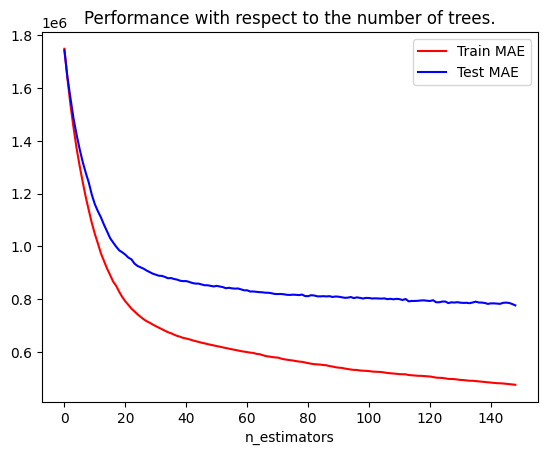

In [ ]:
# Plot the training and test scores
plt.plot(score_train, color='red', label='Train MAE')
plt.plot(score_test, color='blue', label='Test MAE')

# Label the axes and set the title
plt.xlabel('n_estimators')
plt.ylabel('')
plt.title('Performance with respect to the number of trees.')

# Display the legend and the plot
plt.legend()
plt.show()

We notice that the model improves when we increase the number of estimators.

### Determining the best depth of the trees.

In [ ]:
# We do the some for the depth of the tree, and fix the n_estimators to 100.
score_train_d ,score_test_d = [], []

for i in range(1,16):
    gra_boost_model = GradientBoostingRegressor(n_estimators= 100, max_depth= i).fit(X_train,y_train.ravel())
    score_train_d.append(mean_absolute_error(y_train, gra_boost_model.predict(X_train)))
    score_test_d.append(mean_absolute_error(y_test, gra_boost_model.predict(X_test)))

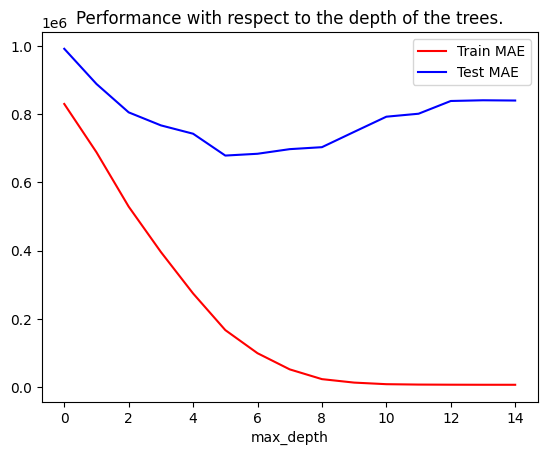

In [ ]:
# Plot the training and test scores
plt.plot(score_train_d, c='r', label='Train MAE')   
plt.plot(score_test_d,c='blue', label = 'Test MAE')

# Label the axes and set the title
plt.xlabel('max_depth')
plt.ylabel('')
plt.title('Performance with respect to the depth of the trees.')

# Display the legend and the plot
plt.legend()
plt.show()

We notice that if we use depth bigger than 7, the model will overfit.

####  Importance of the data size in the learning phase.

In [ ]:
# We create two empty lists, one for the score on the train set, and the test set 
score_size_train = []
score_size_test = []


for train_size in np.arange(0.1,1,0.025):
    
    # We choose the diffrent sizes of the train set from 10%, 12.5%, 15%, ... 97.5%
    X_train_f, y_train_f, X_test_f, y_test_f = split_data(df, 1 - train_size, 7)
    
    # We choose the GradientBoosting regressor
    gra_boost_model = GradientBoostingRegressor(n_estimators= 100, max_depth=3)

    # We train the model
    gra_boost_model.fit(X_train_f,y_train_f.to_numpy().ravel())
    
    # We add the R2 scores of the model to the respective list
    score_size_train.append(gra_boost_model.score(X_train_f,y_train_f))
    score_size_test.append(gra_boost_model.score(X_test_f,y_test_f))

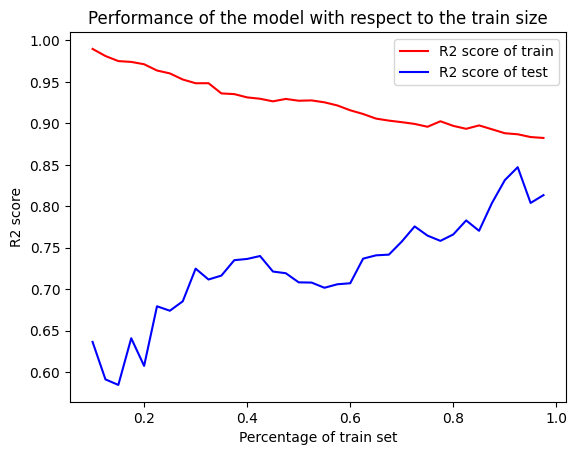

In [ ]:
# Plot the training and test scores
plt.plot(np.arange(0.1,1,0.025), score_size_train, c='r', label='R2 score of train')
plt.plot(np.arange(0.1,1,0.025),score_size_test, c='blue', label='R2 score of test')

# Label the axes and set the title
plt.xlabel('Percentage of train set')
plt.ylabel('R2 score')
plt.title('Performance of the model with respect to the train size')

# Display the legend and the plot
plt.legend()
plt.show()

 We observe that as the size of the training dataset increases, the generalization score tends to improve. However, once we exceed a 90% threshold, the generalization score starts to decline.

## 3.4 Features importances

#### Gradient boosting and random forest regressors
Gini impurity ...

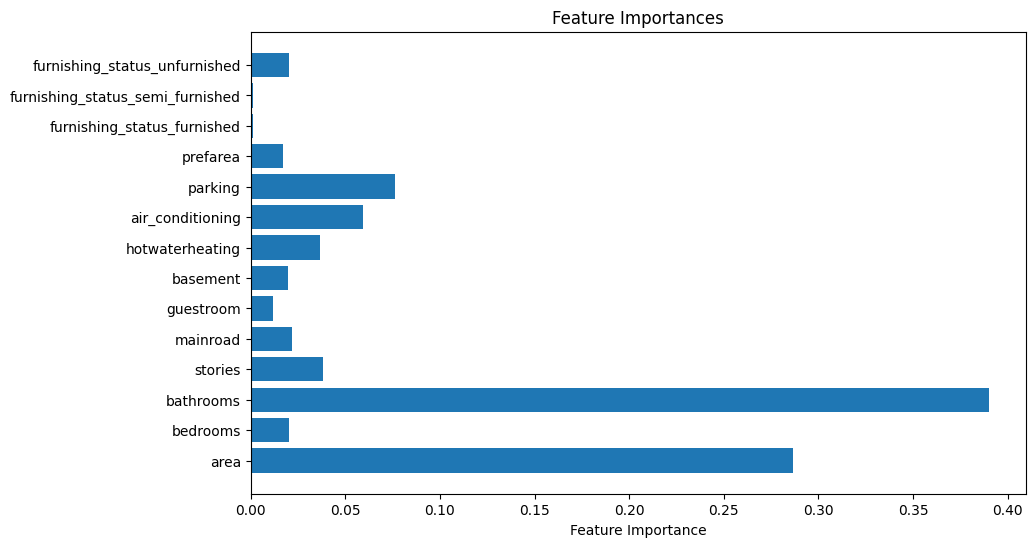

In [ ]:
gra_boost_model = GradientBoostingRegressor().fit(X_train, y_train.ravel())
importances = gra_boost_model.feature_importances_
feature_names = X_train.columns  # Names of features

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(range(len(importances)), importances, tick_label=feature_names)
plt.xlabel('Feature Importance')
plt.title('Feature Importances')
plt.show()

# 4 Bonus

#### GridSearchCV for the Gradient Boosting model.
We describe briefly what is GridSearchCV. It is an algorithm that search for the best parameters of a certain model. First we provide the parameters (a dictionnary) we want to test, and the number of cross validations denoted by cv (an integer). It starts by deviding the training set $X_{train}$ into k equal subsets $P_1,\cdots,P_k$, then it fits the model on $\bigcup\limits_{i\neq i_0}P_i$, and gets the score on $P_{i_0}$, for $i_0=1,\cdots,k$.  

In [ ]:
# We begin by importing the GridSearchCV
from sklearn.model_selection import GridSearchCV

# We choose the model we want to determine it best parameters.
gra_boost_model = GradientBoostingRegressor()

# We specify the parameters that we want GridSearchCV to use when tuning the model.
parameters = {
    'n_estimators':[i for i in range(1,100)], 
    'max_depth':[i for i in range(1,5)]
}

# Create a GridSearchCV object to search for the best hyperparameters
clf = GridSearchCV(gra_boost_model, parameters, cv=5)

# Fit the model to the training data
clf.fit(X_train, y_train.ravel())

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [1, 2, 3, 4],
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...]})

In [ ]:
# to get the best parameters we use the following method
clf.best_params_

{'max_depth': 4, 'n_estimators': 95}

#### RandomizedSearchCV for the Gradient Boosting model
RandomizedSearchCV is a method for finding the best hyperparameters for machine learning models by randomly sampling parameter combinations. It's efficient for large search spaces and allows you to control the number of iterations for the search.

In [ ]:
# We begin by importing the RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# We choose the model we want to determine its best parameters.
gra_boost_model = GradientBoostingRegressor()

# We specify the parameters and their distributions for RandomizedSearchCV.
param_dist = {
    'n_estimators': [i for i in range(1, 150)],
    'max_depth': [i for i in range(1, 10)]
}

# Create a RandomizedSearchCV object to search for the best hyperparameters.
clf_random = RandomizedSearchCV(gra_boost_model, param_distributions=param_dist, n_iter=100, cv=5,refit=True)

# Fit the model to the training data.
clf_random.fit(X_train, y_train.ravel())


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_iter=100,
                   param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8,
                                                      9],
                                        'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15, 16, 17, 18, 19, 20,
                                                         21, 22, 23, 24, 25, 26,
                                                         27, 28, 29, 30, ...]})

In [ ]:
# Display the best parameters for gradient boosting using a RandomizedSearchCV
clf_random.best_params_

{'n_estimators': 93, 'max_depth': 4}

#### Distribution of real and predicted values for Gradient boosting model

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_regression_evaluation(y_true, y_pred, model_name):
    # Distribution des valeurs réelles vs. valeurs prédites
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.hist(y_true, alpha=0.5, label='Réel', bins=20)
    plt.hist(y_pred, alpha=0.5, label='Prédit', bins=20)
    plt.legend()
    plt.xlabel('Valeurs')
    plt.ylabel('Fréquence')
    plt.title(f'Distribution des valeurs réelles vs. prédites - {model_name}')

    # Scatter Plot des valeurs réelles vs. prédites
    plt.subplot(1, 2, 2)
    plt.scatter(y_true, y_pred)
    plt.xlabel('Réel')
    plt.ylabel('Prédit')
    plt.title(f'Scatter Plot des valeurs réelles vs. prédites - {model_name}')

    plt.tight_layout()

    plt.show()

##### comment and write in eglish .....

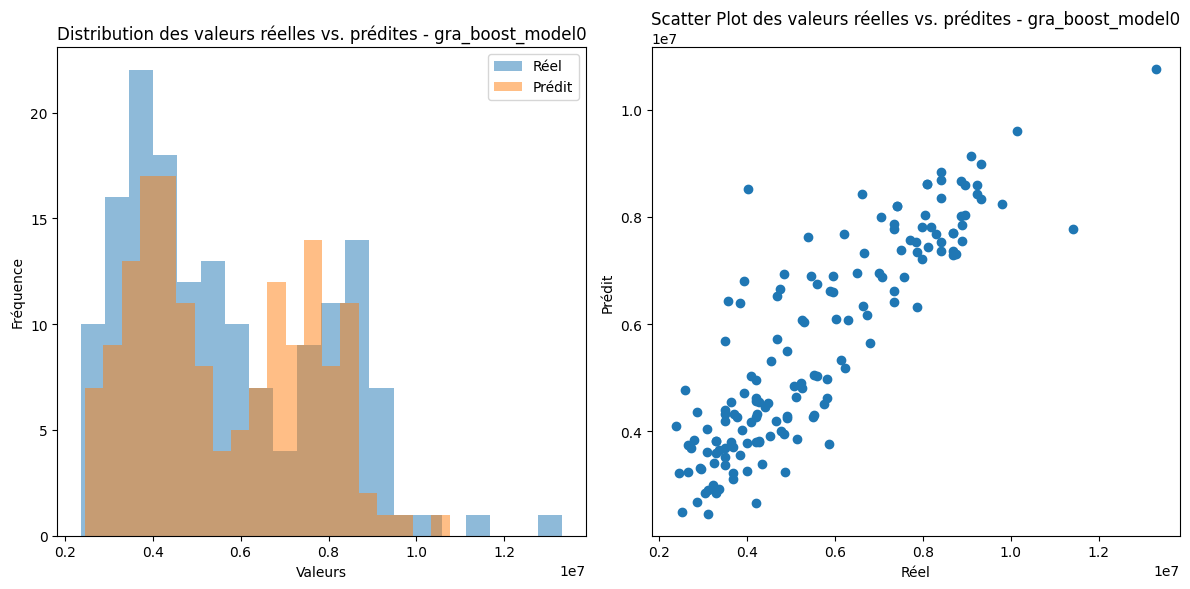

In [ ]:
# Après avoir calculé y_pred, y_test, mean_absolute_err, et r_squared comme dans votre code

# Renommez y_pred et y_test pour refléter le modèle utilisé
y_true= y_test
y_pred= gra_boost_model0.predict(X_test)

# Appelez la fonction plot_regression_evaluation avec le nom du modèle
model_name = "gra_boost_model0"  # Vous pouvez remplacer par le nom de votre modèle
plot_regression_evaluation(y_true, y_pred, model_name)
